In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [280]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from google.colab import files

#Loading the Dataset

In [281]:
data=pd.read_csv("/content/RELIANCE.NS.csv")
data=data.set_index(pd.DatetimeIndex(data['Date']))

In [282]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2021-01-25,2021-01-25,2034.949951,2034.949951,1932.000000,1941.000000,1922.178345,25016570
2021-01-27,2021-01-27,1925.000000,1925.000000,1888.000000,1895.000000,1876.624512,19553809
2021-01-28,2021-01-28,1880.150024,1923.300049,1870.000000,1876.550049,1858.353394,15722291
2021-01-29,2021-01-29,1894.300049,1913.099976,1830.000000,1841.949951,1824.088867,20173258
2021-02-01,2021-02-01,1859.400024,1905.000000,1848.000000,1895.300049,1876.921509,15774504
...,...,...,...,...,...,...,...
2024-01-17,2024-01-17,2719.000000,2772.550049,2710.050049,2723.149902,2723.149902,6098691
2024-01-18,2024-01-18,2702.800049,2742.000000,2702.500000,2735.899902,2735.899902,5139719
2024-01-19,2024-01-19,2752.000000,2752.000000,2718.000000,2734.899902,2734.899902,5211352


In [283]:
closing_price=data["Close"]

In [284]:
closing_price

Date
2021-01-25    1941.000000
2021-01-27    1895.000000
2021-01-28    1876.550049
2021-01-29    1841.949951
2021-02-01    1895.300049
                 ...     
2024-01-17    2723.149902
2024-01-18    2735.899902
2024-01-19    2734.899902
2024-01-22    2734.899902
2024-01-23    2657.149902
Name: Close, Length: 742, dtype: float64

Visualising Closing Price History

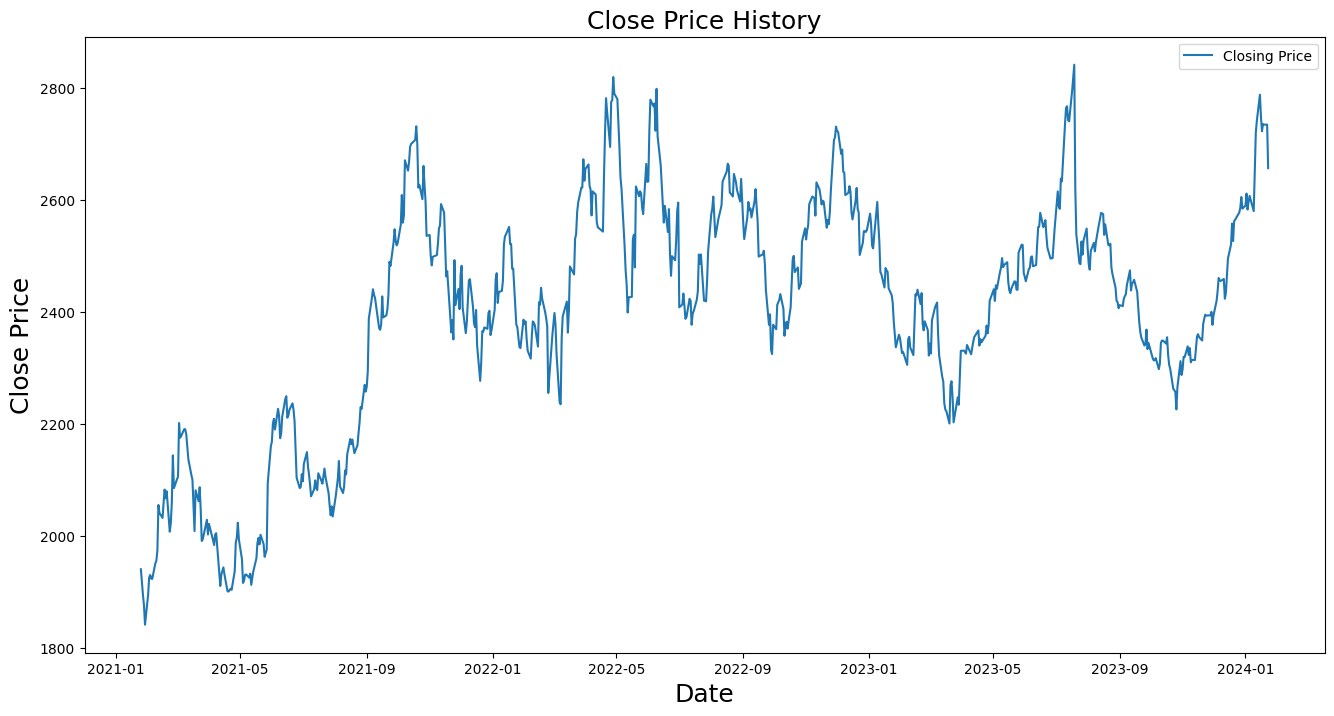

In [285]:
plt.figure(figsize=(16,8))
plt.title("Close Price History",fontsize=18)
plt.plot(closing_price,label='Closing Price')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.legend()
plt.show()

#Technical Indicators Calculations

1) Simple Moving Average

In [286]:
def SMA(df,period,column="Close"):
  return df[column].rolling(window=period).mean()


In [287]:
data["SMA"]=SMA(data,20)

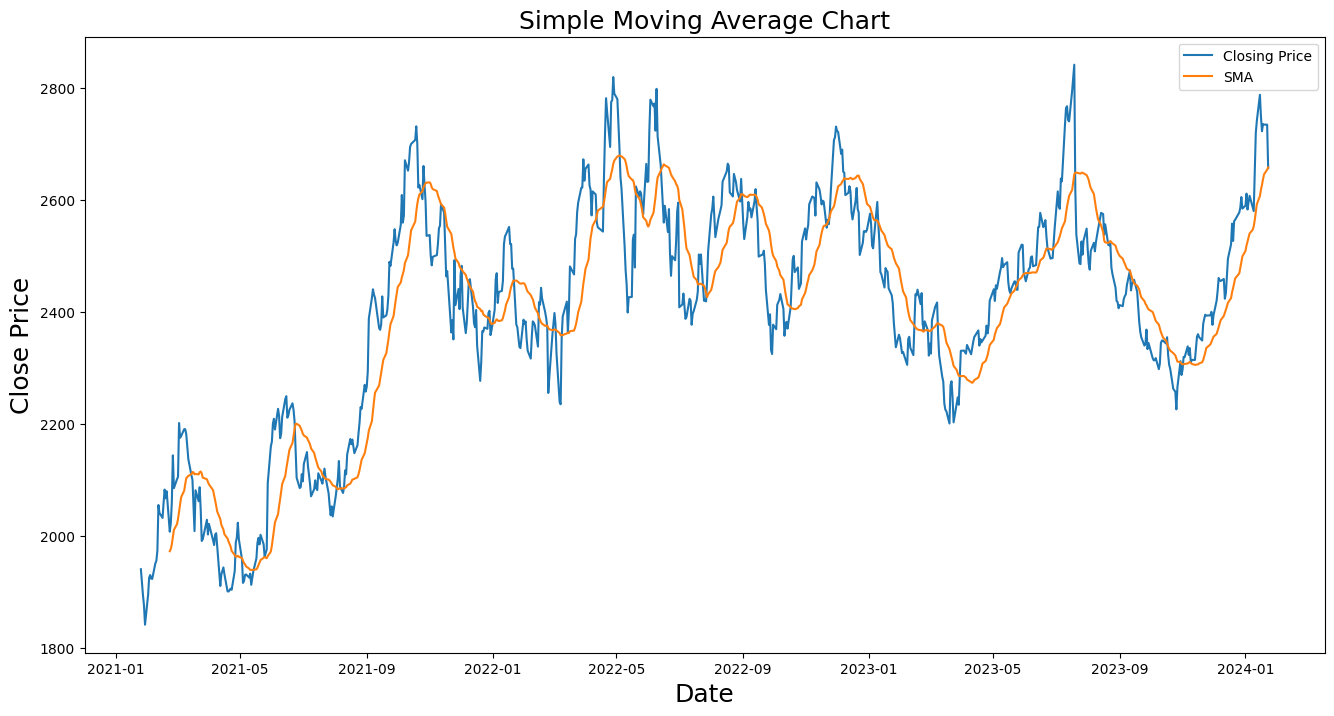

In [288]:
plt.figure(figsize=(16,8))
plt.title("Simple Moving Average Chart",fontsize=18)
plt.plot(closing_price,label='Closing Price')
plt.plot(data["SMA"],label="SMA")
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.legend()
plt.show()

2) Relative Strength Index (RSI)

In [289]:
def calculate_rsi(df,period,column="Close"):
    prices=df[column]
    delta = prices.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window = period).mean()
    avg_loss = loss.rolling(window = period).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

In [290]:
data['RSI'] = calculate_rsi(data, 14)

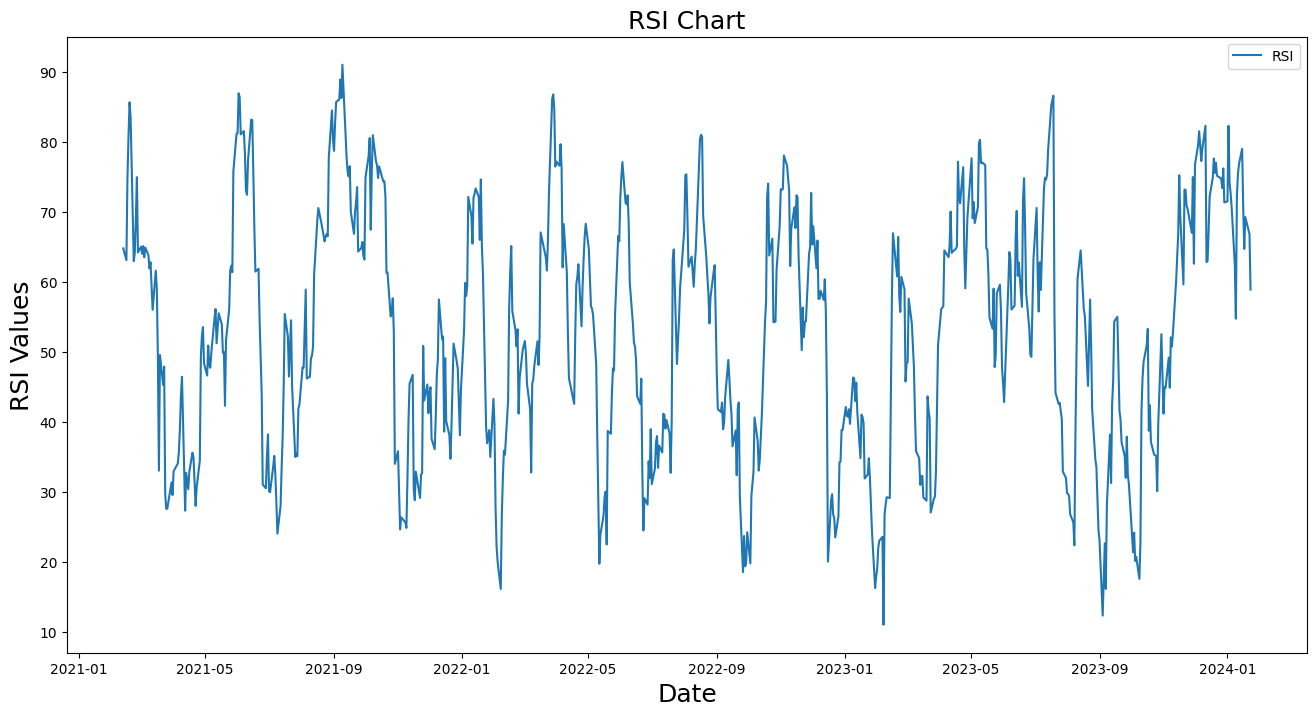

In [291]:
plt.figure(figsize=(16,8))
plt.title("RSI Chart",fontsize=18)
plt.plot(data["RSI"],label="RSI")
plt.xlabel('Date',fontsize=18)
plt.ylabel('RSI Values',fontsize=18)
plt.legend()
plt.show()

3) Bollinger Bands

In [292]:
def Bolinger_Bands(df, period, num_of_std,column="Close"):
    rolling_mean=df[column].rolling(window=period).mean()
    rolling_std  = df[column].rolling(window=period).std()
    upper_band = rolling_mean + (rolling_std*num_of_std)
    lower_band = rolling_mean - (rolling_std*num_of_std)

    return rolling_mean,upper_band, lower_band


In [293]:
data["Bollinger MA"],data["Bollinger Up"],data["Bollinger Down"]=Bolinger_Bands(data,20,2)

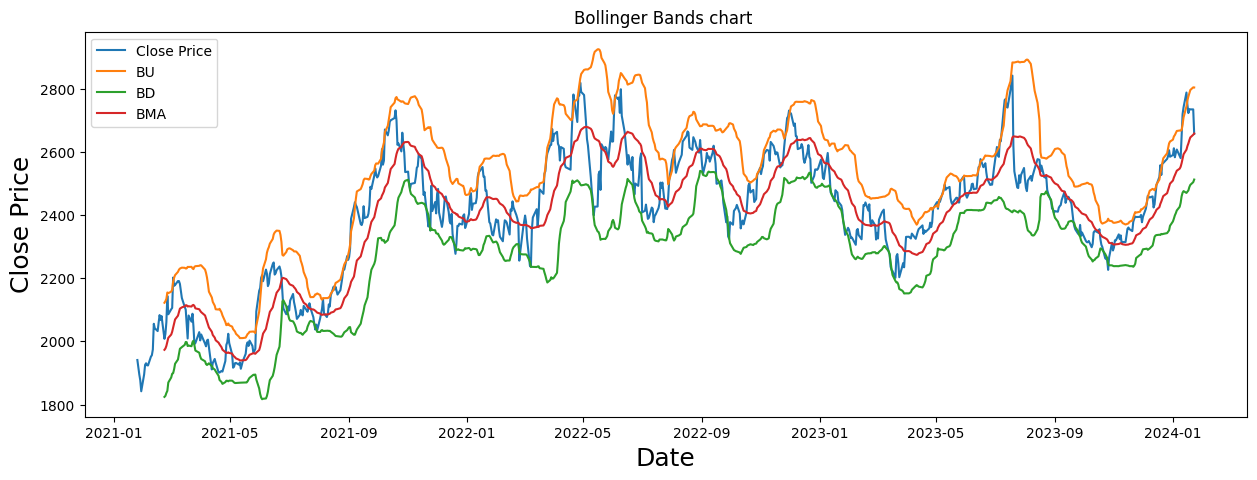

In [294]:
plt.figure(figsize=(15,5))
plt.title('Bollinger Bands chart ')
plt.plot(data['Close'],label="Close Price")
plt.plot(data["Bollinger Up"],label="BU")
plt.plot(data["Bollinger Down"],label="BD")
plt.plot(data["Bollinger MA"],label="BMA")
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.legend()
plt.show()

4) MACD
(Moving Average Convergence Divergence)

In [295]:
def computeMACD (df, n_fast, n_slow, n_smooth,column="Close"):
    fastEMA = df[column].ewm(span=n_fast, adjust=False).mean()
    slowEMA = df[column].ewm(span=n_slow, adjust=False).mean()
    MACD = fastEMA-slowEMA
    MACDsig = MACD.ewm(span=n_smooth, adjust=False).mean()
    MACDhist =MACD - MACDsig
    return MACD,MACDsig,MACDhist

In [296]:
data["MACD"],data["MACDsig"],data["MACDhist"]=computeMACD(data,12,26,9)

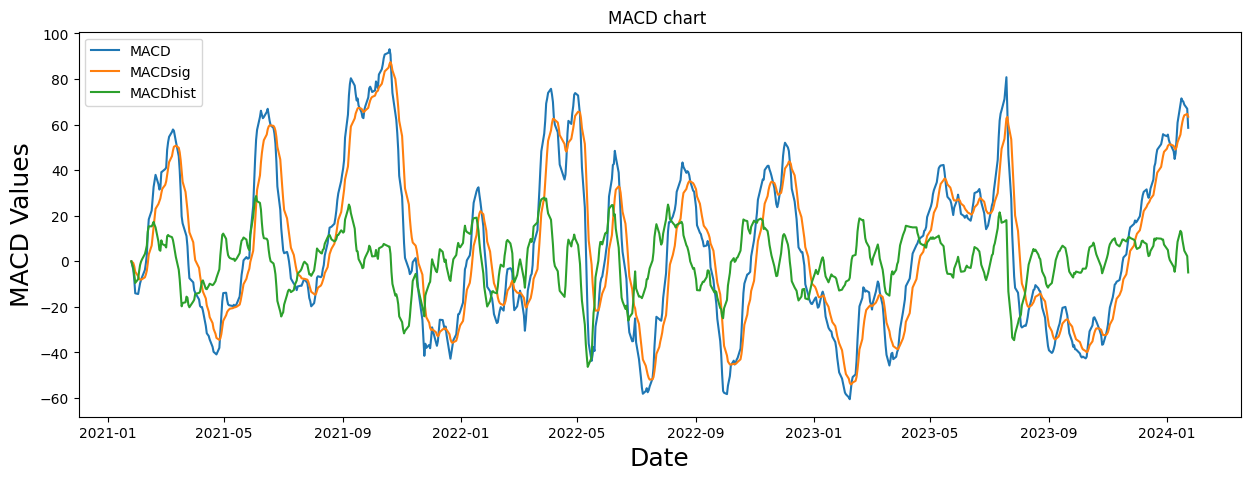

In [297]:
plt.figure(figsize=(15,5))
plt.title('MACD chart ')
plt.plot(data["MACD"],label="MACD")
plt.plot(data["MACDsig"],label="MACDsig")
plt.plot(data["MACDhist"],label="MACDhist")
plt.xlabel('Date',fontsize=18)
plt.ylabel('MACD Values',fontsize=18)
plt.legend()
plt.show()

Scaling every indiactor to bring all of them to same level

In [298]:
columns=["SMA","RSI","Bollinger Up","Bollinger Down","MACDhist"]
data1=data[columns]
scaler = MinMaxScaler()
data1[columns] = scaler.fit_transform(data1[columns])
data1

<ipython-input-298-430739826ec7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1[columns] = scaler.fit_transform(data1[columns])


,SMA,RSI,Bollinger Up,Bollinger Down,MACDhist
Date,,,,,
2021-01-25,NaN,NaN,NaN,NaN,0.617828
2021-01-27,NaN,NaN,NaN,NaN,0.578668
2021-01-28,NaN,NaN,NaN,NaN,0.540558
2021-01-29,NaN,NaN,NaN,NaN,0.491533
2021-02-01,NaN,NaN,NaN,NaN,0.513396
...,...,...,...,...,...
2024-01-17,0.928548,0.671080,0.836413,0.914364,0.743444
2024-01-18,0.942648,0.727899,0.847600,0.929068,0.712737
2024-01-19,0.954290,0.720414,0.858873,0.938632,0.680009


#Performing correlation analysis of the indicators

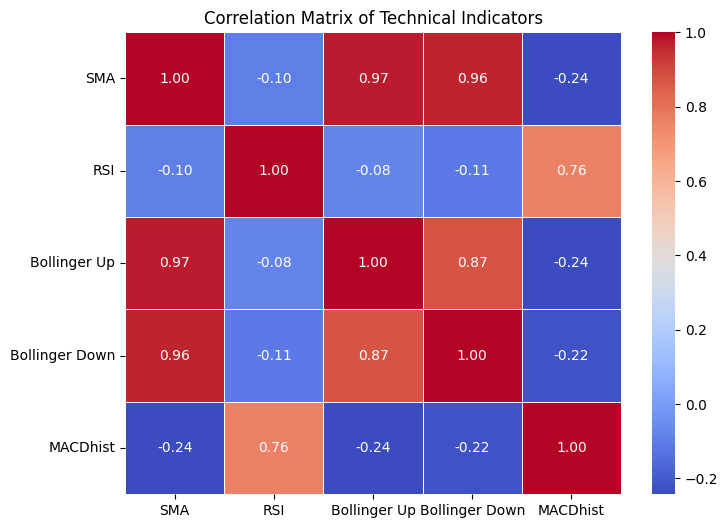

In [299]:
correlation_matrix = data1.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Technical Indicators')
plt.show()

Calculating the weights using correlation matrix

In [300]:
weights=correlation_matrix.abs().sum(axis=1)
weights/=weights.sum()
weights

SMA               0.231761
RSI               0.145032
Bollinger Up      0.224306
Bollinger Down    0.224263
MACDhist          0.174638
dtype: float64

Calculating new indicator by taking the weighted sum of four indicators used

In [301]:
new_indicator=0
for i in range(len(columns)):
  new_indicator=weights[i]*data1[columns[i]]
data["new_indicator"]=new_indicator


Visualing the new indicator

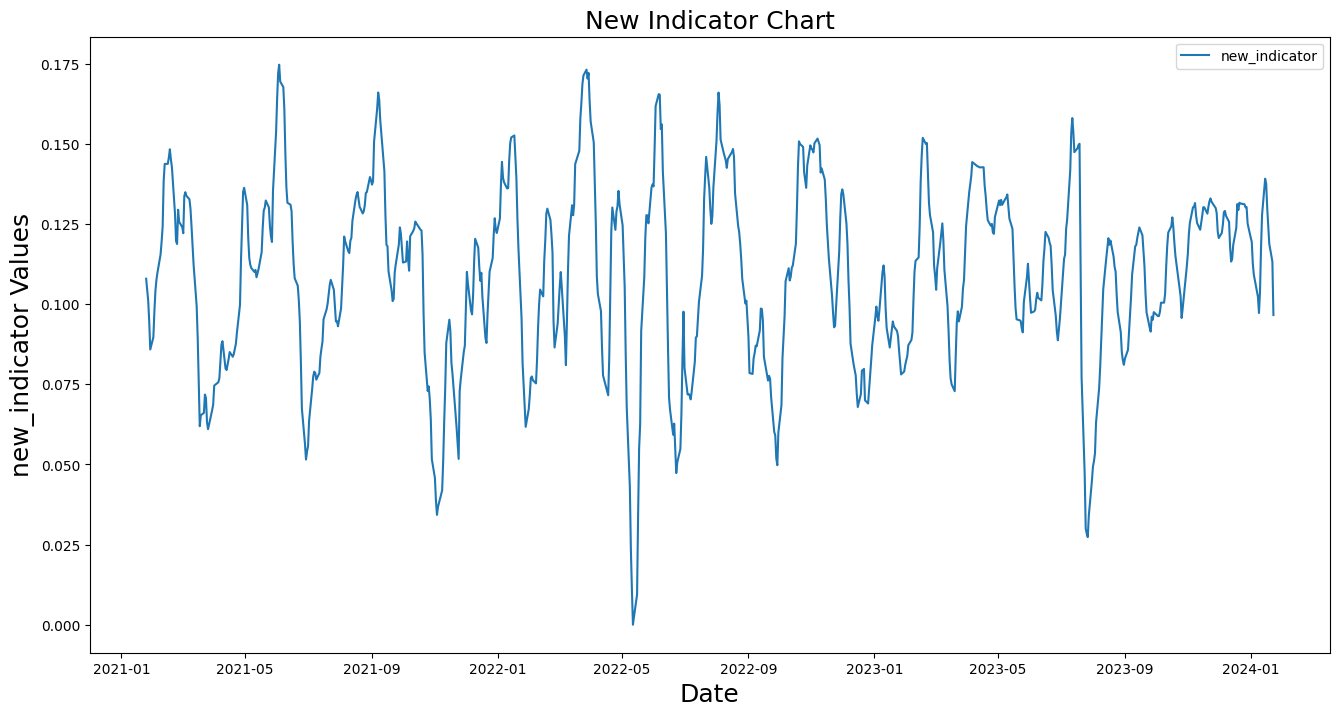

In [302]:
plt.figure(figsize=(16,8))
plt.title("New Indicator Chart",fontsize=18)
plt.plot(data["new_indicator"],label="new_indicator")
plt.xlabel('Date',fontsize=18)
plt.ylabel('new_indicator Values',fontsize=18)
plt.legend()
plt.show()

# Combined Indicator

Calculation of moving averege for new indicator to predict positions on each time-stamp

In [303]:
def moving_average_new_indicator(df,column,period=10):
  ni=df[column]
  l=df[column].rolling(window=period).mean()
  l[0]=df[column][0]
  s=l[0]
  for i in range(1,period):
    s+=ni[i]
    l[i]=s/(i+1)
  # print(ni)
  return l


In [304]:
data["sma_new_indicator"]=moving_average_new_indicator(data,"new_indicator",10)
data["sma_new_indicator"]

Date
2021-01-25    0.107896
2021-01-27    0.104477
2021-01-28    0.101119
2021-01-29    0.097299
2021-02-01    0.095771
                ...   
2024-01-17    0.117186
2024-01-18    0.118716
2024-01-19    0.119848
2024-01-22    0.120948
2024-01-23    0.120885
Name: sma_new_indicator, Length: 742, dtype: float64

In [305]:
# true outcomes calculations
true_outcomes=['S']
for i in range(1,len(data["Close"])):
  returns=(data["Close"][i]-data["Close"][i-1])/data["Close"][i-1] # if return is postive the long else short
  if(returns>0):
    true_outcomes.append('L')
  else:
    true_outcomes.append('S')
print(true_outcomes)

['S', 'S', 'S', 'S', 'L', 'L', 'L', 'S', 'S', 'L', 'L', 'L', 'L', 'S', 'S', 'L', 'L', 'S', 'L', 'S', 'L', 'L', 'L', 'S', 'L', 'L', 'L', 'S', 'L', 'L', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'L', 'S', 'L', 'S', 'S', 'L', 'L', 'S', 'L', 'S', 'S', 'L', 'L', 'S', 'S', 'L', 'L', 'S', 'S', 'S', 'L', 'S', 'L', 'L', 'L', 'L', 'S', 'S', 'S', 'L', 'L', 'L', 'S', 'L', 'S', 'L', 'L', 'L', 'L', 'S', 'L', 'S', 'S', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'S', 'L', 'S', 'S', 'L', 'L', 'L', 'L', 'S', 'L', 'L', 'L', 'S', 'S', 'S', 'S', 'S', 'L', 'L', 'S', 'L', 'L', 'S', 'S', 'S', 'S', 'L', 'L', 'S', 'S', 'L', 'S', 'S', 'L', 'S', 'S', 'S', 'S', 'L', 'S', 'L', 'L', 'L', 'L', 'S', 'S', 'L', 'L', 'S', 'L', 'L', 'S', 'L', 'S', 'L', 'L', 'L', 'L', 'S', 'L', 'S', 'L', 'L', 'L', 'L', 'L', 'S', 'S', 'S', 'S', 'L', 'L', 'S', 'L', 'L', 'L', 'L', 'S', 'L', 'L', 'S', 'S', 'L', 'L', 'L', 'S', 'L', 'L', 'S', 'L', 'L', 'L', 'L', 'L', 'S', 'S', 'L', 'S', 'L', 'S', 'S', 'S', 'L', 'S', 'S', 'L', 'L', 'L', 'L', 'L', 'L', 'S', 'S',

In [306]:
# prediction of outcomes
predicted_outcomes=['S']
for i in range(1,len(data["Close"])):
  value=(data["new_indicator"][i]-data["sma_new_indicator"][i]) # if current new indicator is greater then average new indicator then long else short
  if(value>0):
    predicted_outcomes.append('L')
  else:
    predicted_outcomes.append('S')

In [307]:
# accuracy calculation
acc=accuracy_score(true_outcomes,predicted_outcomes)
print(acc)

0.5983827493261455


Downloading the final csv

In [308]:
data["Prediction"]=predicted_outcomes

In [309]:
data.to_csv('final_data.csv', index=False)

# Download the CSV file
files.download('final_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>